In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Model
- ResNet50V2
- Optimizer: Adam
- Batch size: 256
- Dense layer: 512 units
- Dropout: 0.05
- Dilation: 5px
- Epochs: 100
- Patience: 10 epochs
- YOLO confidence 0.5

In [2]:
path = '/Users/josephking/Documents/sponsored_projects/MERGEN/output/MakeModelClassifier/2021-11-10-20h54/logs'
df = pd.read_csv(os.path.join(path, 'predictions.csv'))
ovr_conf_mat = pd.read_csv(os.path.join(path, 'OVR Confusion Matrix.csv')).rename(columns={'Unnamed: 0': 'Make-Model'})
conf_mat = pd.read_csv(os.path.join(path, 'confusion_matrix.csv')).rename(columns={'Unnamed: 0': 'Make-Model'})

## OVR Confusion Matrix

#### Count of images per Make-Model class in test set

In [3]:
counts = df.groupby('true_label')['Acura CL'].count().reset_index().rename(columns={'Acura CL': 'count', 'true_label': 'Make-Model'})

In [4]:
counts['count'].describe()

count    507.000000
mean      34.672584
std       34.216691
min        6.000000
25%       13.000000
50%       23.000000
75%       43.000000
max      236.000000
Name: count, dtype: float64

In [5]:
ovr_conf_mat = ovr_conf_mat.merge(counts, how='left')

In [6]:
ovr_conf_mat = ovr_conf_mat.sort_values(by=['F1'], ascending=False).reset_index(drop=True)
ovr_conf_mat

,Make-Model,TP,FN,FP,TN,Accuracy,Precision,Recall_Sensitivity_TPR,FNR,FPR,Specificity_TNR,F1,count
0,smart fortwo,48,2,1,17528,0.9998,0.9796,0.9600,0.0400,0.0001,0.9999,0.9697,50
1,Chevrolet Venture,13,1,0,17565,0.9999,1.0000,0.9286,0.0714,0.0000,1.0000,0.9630,14
2,Jeep Wrangler,61,3,5,17510,0.9995,0.9242,0.9531,0.0469,0.0003,0.9997,0.9385,64
3,Jeep Renegade,14,0,2,17563,0.9999,0.8750,1.0000,0.0000,0.0001,0.9999,0.9333,14
4,Mercedes-Benz G-Class,48,4,3,17524,0.9996,0.9412,0.9231,0.0769,0.0002,0.9998,0.9320,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Mazda 626,0,9,5,17565,0.9992,0.0000,0.0000,1.0000,0.0003,0.9997,0.0000,9
503,Pontiac G5,0,6,2,17571,0.9995,0.0000,0.0000,1.0000,0.0001,0.9999,0.0000,6
504,Volkswagen GLI,0,6,1,17572,0.9996,0.0000,0.0000,1.0000,0.0001,0.9999,0.0000,6
505,Chevrolet Classic,0,6,4,17569,0.9994,0.0000,0.0000,1.0000,0.0002,0.9998,0.0000,6


## Make-Model sorted best to worst F1

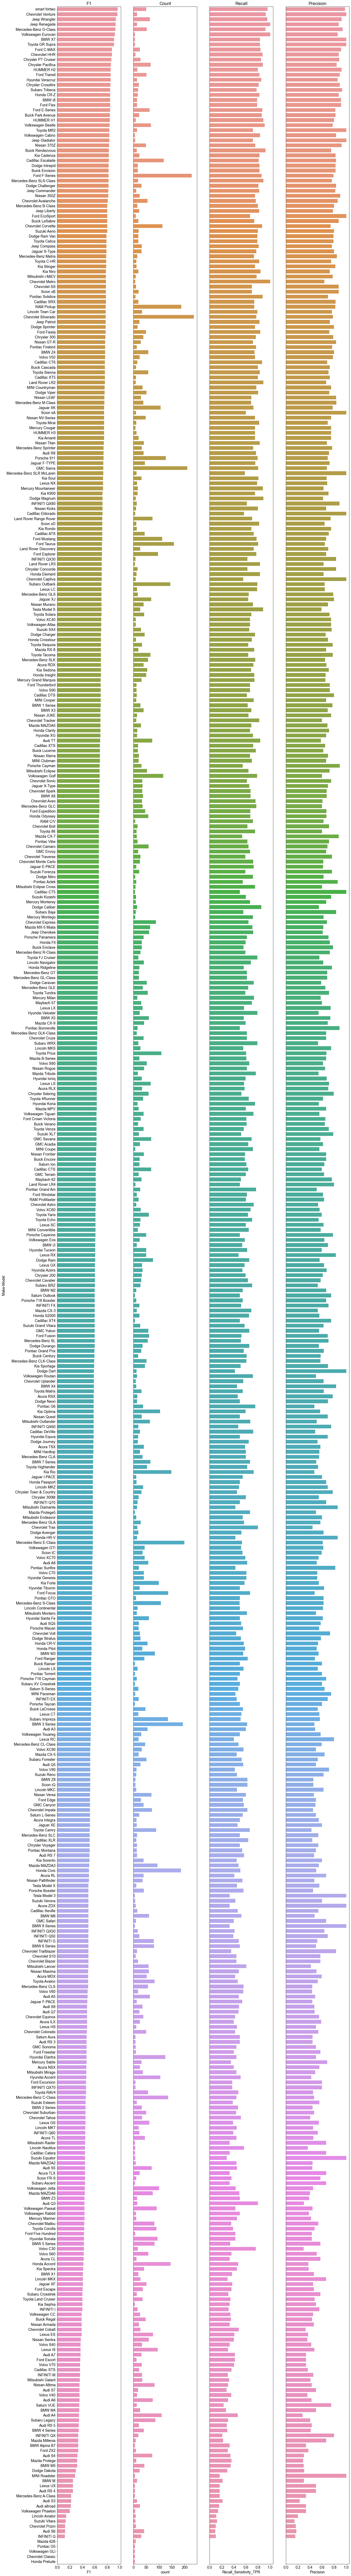

In [7]:
plt.close()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 180), sharey=True)
sns.set(font_scale=1.2)
sns.barplot(data=ovr_conf_mat, x='F1', y='Make-Model', ax=ax1)
ax1.title.set_text('F1')
sns.barplot(data=ovr_conf_mat, x='count', y='Make-Model', ax=ax2)
ax2.title.set_text('Count')
ax2.axes.get_yaxis().set_visible(False)
sns.barplot(data=ovr_conf_mat, x='Recall_Sensitivity_TPR', y='Make-Model', ax=ax3)
ax3.title.set_text('Recall')
ax3.axes.get_yaxis().set_visible(False)
sns.barplot(data=ovr_conf_mat, x='Precision', y='Make-Model', ax=ax4)
ax4.title.set_text('Precision')
ax4.axes.get_yaxis().set_visible(False)
plt.show()